In [3]:
# Evaluating Logistic Regression with Cross-Validation
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('titanic.csv')

# Preprocessing 
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Features and target
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']]
y = df['Survived']

# Single Train-Test Split Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
single_split_accuracy = accuracy_score(y_test, y_pred)
print(f'Single Train-Test Split Accuracy: {single_split_accuracy:.4f}')

# K-Fold Cross-Validation
k = 10
cv_scores = cross_val_score(logreg, X, y, cv=k, scoring='accuracy')
cv_accuracy = cv_scores.mean()
print(f'{k}-Fold Cross-Validation Accuracy: {cv_accuracy:.4f}')

# Comparing Results
print(f'Difference in Accuracy: {cv_accuracy - single_split_accuracy:.4f}')


Single Train-Test Split Accuracy: 0.8101
10-Fold Cross-Validation Accuracy: 0.7901
Difference in Accuracy: -0.0199


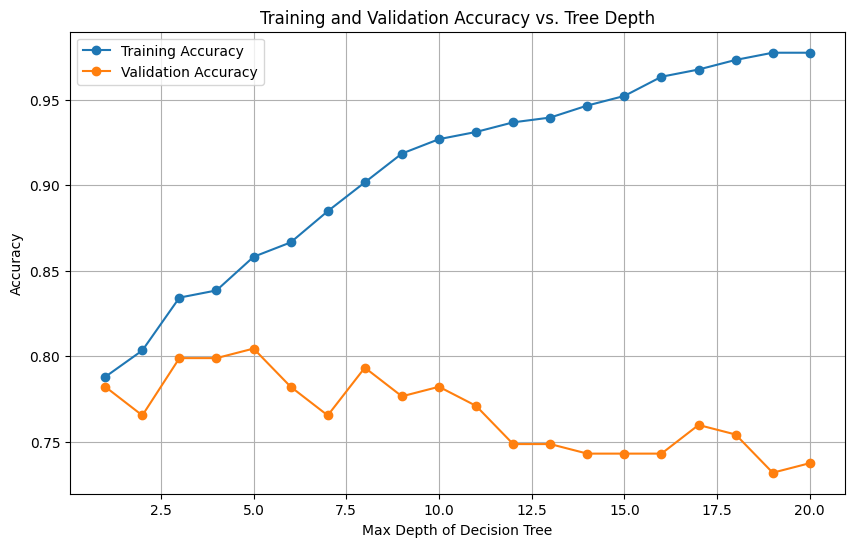

In [4]:
#Analyzing Overfitting and Underfitting in Decision Trees
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

X = df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']]
y = df['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Lists to store accuracies
train_accuracies = []
val_accuracies = []

# Training Decision Tree classifiers with varying depths
max_depth_range = range(1, 21)
for depth in max_depth_range:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    
    # Training accuracy
    train_acc = accuracy_score(y_train, tree.predict(X_train))
    train_accuracies.append(train_acc)
    
    # Validation accuracy
    val_acc = accuracy_score(y_val, tree.predict(X_val))
    val_accuracies.append(val_acc)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depth_range, val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
#Calculating Precision, Recall, and F1-Score for Logistic Regressio
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

df = pd.read_csv('titanic.csv')

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

X = df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']]
y = df['Survived']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Making predictions
y_pred = logreg.predict(X_test)

# Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing the results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Precision: 0.8030
Recall: 0.7162
F1-Score: 0.7571

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



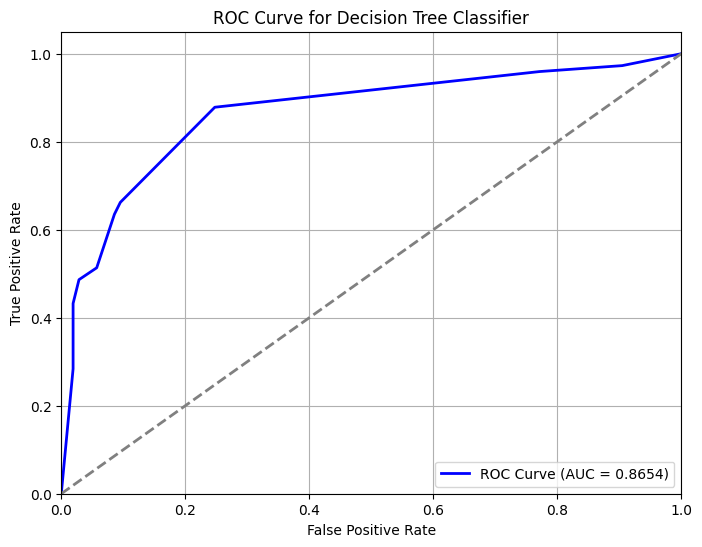

Area Under the Curve (AUC): 0.8654


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


X = df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

# Predicting probabilities
y_probs = tree.predict_proba(X_test)[:, 1]  # Probability of the positive class

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


print(f'Area Under the Curve (AUC): {roc_auc:.4f}')


In [8]:
#Comparing Model Performance with and without Cross-Validation
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load the Titanic dataset
df = pd.read_csv('titanic.csv')

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

X = df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']]
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training models without Cross-Validation
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Decision Tree
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Evaluating Performance without Cross-Validation
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Performance (Without Cross-Validation):")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_tree, "Decision Tree")

# Training models with Cross-Validation
# Cross-validation for Logistic Regression
logreg_cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
logreg_cv_precision = cross_val_score(logreg, X, y, cv=5, scoring='precision')
logreg_cv_recall = cross_val_score(logreg, X, y, cv=5, scoring='recall')

# Cross-validation for Decision Tree
tree_cv_scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy')
tree_cv_precision = cross_val_score(tree, X, y, cv=5, scoring='precision')
tree_cv_recall = cross_val_score(tree, X, y, cv=5, scoring='recall')

# Evaluating Performance with Cross-Validation
def evaluate_model_cv(cv_scores, cv_precision, cv_recall, model_name):
    print(f"\n{model_name} Performance (With Cross-Validation):")
    print(f"Accuracy (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print(f"Precision (mean ± std): {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
    print(f"Recall (mean ± std): {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")

evaluate_model_cv(logreg_cv_scores, logreg_cv_precision, logreg_cv_recall, "Logistic Regression")
evaluate_model_cv(tree_cv_scores, tree_cv_precision, tree_cv_recall, "Decision Tree")



Logistic Regression Performance (Without Cross-Validation):
Accuracy: 0.8101
Precision: 0.8030
Recall: 0.7162

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Decision Tree Performance (Without Cross-Validation):
Accuracy: 0.8045
Precision: 0.8305
Recall: 0.6622

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179


Logistic Regression Performance (With Cross-Validation):
Accuracy (mean ± std): 0